0.6315723657608032 1.8134190327145916e-07


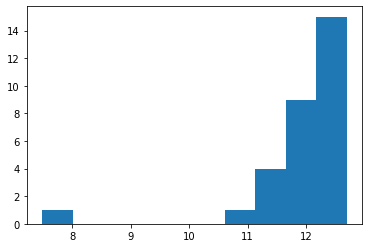

0.9577963948249817 1.7745596658791385e-12


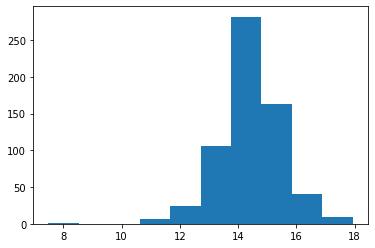

In [3]:
import pandas as pd
import scipy as sc
import matplotlib.pyplot as pl
drug_id = "zebularine"

"""Applies tests to cell lines and outputs result. The Flask app can just call this one method
and get what it needs to finish generating the React page."""

#this filepath only works because the python interpreter is being called from within app/...
AUC_id = drug_id+"_AUC"
data = pd.read_csv("../data/regression_data.tsv", sep="\t")[['site', 'histology', AUC_id]].dropna()
data.sort_values(by=[AUC_id], inplace=True)

highest_AUCs = data[:30]
rest_of_data = data[30:]

assert(highest_AUCs[AUC_id].median() == highest_AUCs[AUC_id].quantile(.5))

res1 = sc.stats.shapiro(highest_AUCs[AUC_id])
statistic2, pvalue2 = sc.stats.shapiro(data[AUC_id])

print(res1.statistic, res1.pvalue)
pl.hist(x=highest_AUCs[AUC_id])
pl.show()
print(statistic2, pvalue2)
pl.hist(x=data[AUC_id])
pl.show()

#test 1: is the mean of highest_AUCs unusual to have emerged randomly from either data or rest_of_data


#test 2: are the proportions of categories in site significantly different from ... or...
#test 3: are the proportions of categories in histology significantly different from data or rest of data



#sensitivity_tests(drug)

In [6]:
frame = pd.DataFrame({"A":[2,3,5],"B":[2,4,6]})
frame.shape

(3, 2)

(array([ 1.,  4.,  6.,  8., 19., 17., 21., 11.,  6.,  7.]),
 array([-2.6197451 , -2.17254278, -1.72534045, -1.27813812, -0.83093579,
        -0.38373346,  0.06346887,  0.5106712 ,  0.95787353,  1.40507586,
         1.85227818]),
 <BarContainer object of 10 artists>)

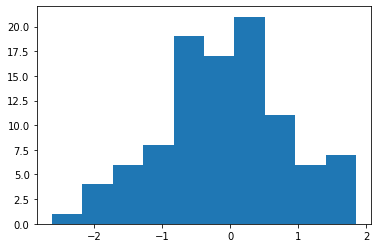

In [11]:
import numpy as np

np.random.seed(42)
normal_data = np.random.normal(size=100)

res3 = sc.stats.shapiro(normal_data)
res3.pvalue

pl.hist(normal_data)

/home/smeeren/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/smeeren/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/smeeren/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


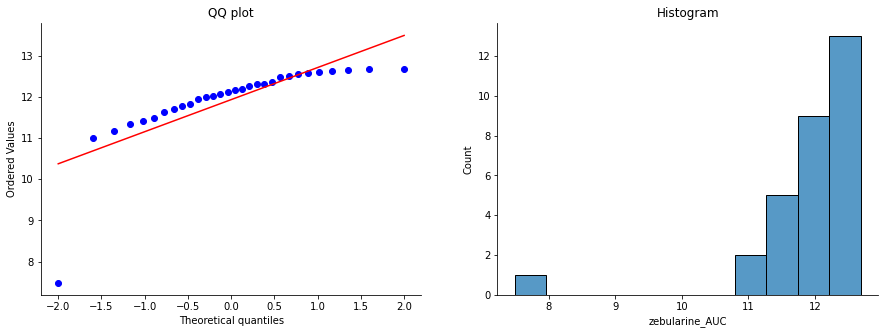

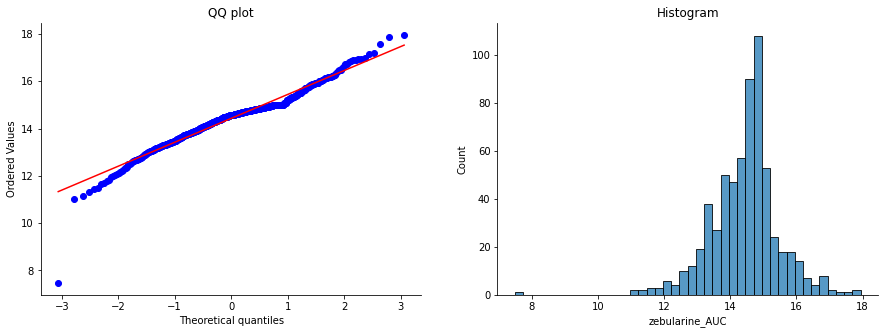

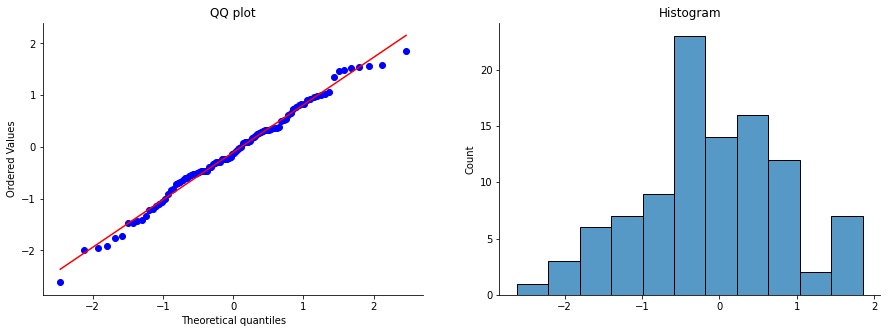

In [14]:
import seaborn as sns

def normality_plots(data):
    fig, axes = pl.subplots(1, 2, figsize=(15, 5))

    sc.stats.probplot(data, dist="norm", plot = axes[0])
    sns.histplot(data, axes=axes[1])

    # format the figures
    titles = ['QQ plot', 'Histogram']
    for i, ax in enumerate(axes):
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_title(titles[i])


normality_plots(highest_AUCs[AUC_id])
normality_plots(data[AUC_id])
normality_plots(normal_data)